In [ ]:
!pip install py-agender[gpu]

In [ ]:

import argparse
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy

In [ ]:
from pyagender import PyAgender
agender = PyAgender() 

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


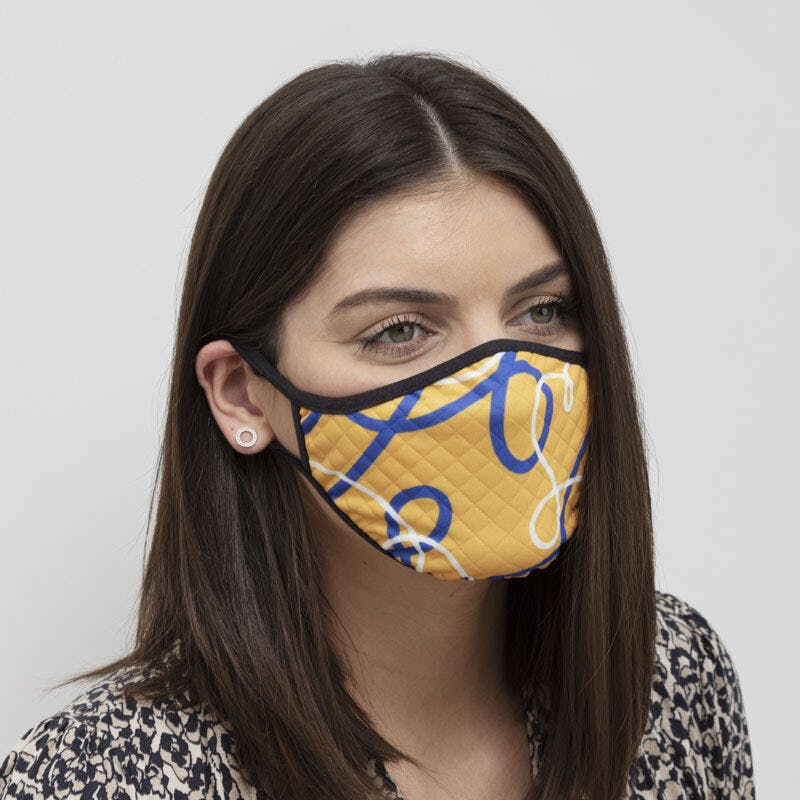

In [ ]:
#image = cv2.imread('/content/drive/My Drive/APS360/APS360 Project/Age Detection/sample_images/baby.jpg')
image = cv2.imread('/content/drive/My Drive/APS360/Project Files/Image1.jpg')
# displaying image
cv2_imshow(image)

In [ ]:
print(image.shape)

(800, 800, 3)


In [ ]:
from PIL import Image


img = Image.open('/content/drive/My Drive/APS360/Project Files/baby.jpg')

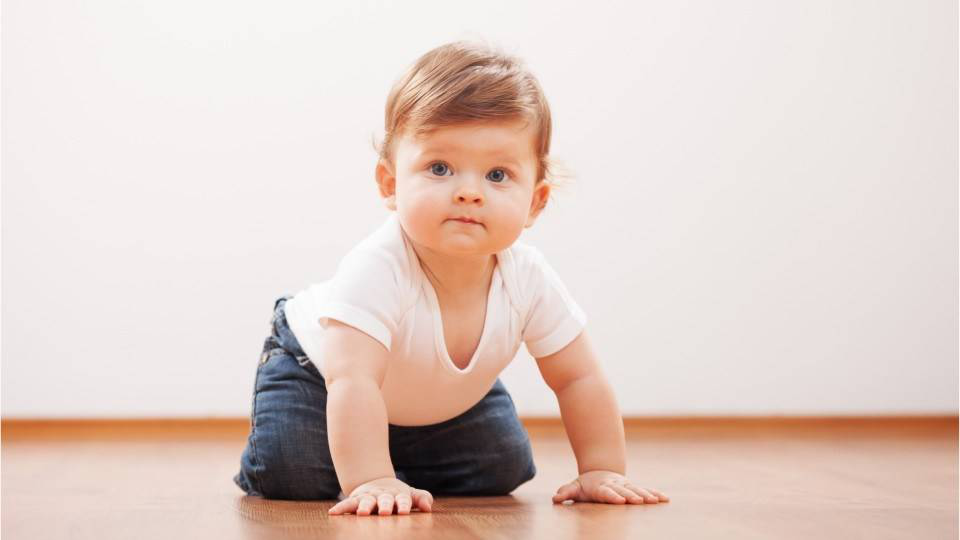

In [ ]:
img

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

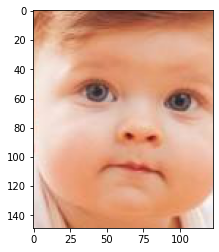

In [ ]:
x_min = 396
y_min = 113
x_max = 519
y_max = 262

x_increase = (x_max - x_min)*0.25
y_increase = (y_max - y_min)*0.25

img_old_cropped = img.crop((x_min, y_min, x_max, y_max))
img_cropped = img.crop((x_min-x_increase, y_min-y_increase, x_max+x_increase, y_max+y_increase))

plt.imshow(img_old_cropped)
#plt.imshow(img_cropped)
#print(img_cropped)

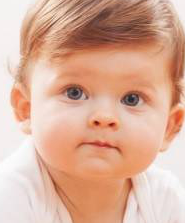

In [ ]:
img_cropped

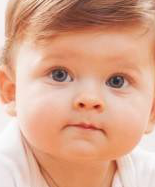

[[[241 243 244]
  [241 243 244]
  [241 243 244]
  ...
  [146 166 207]
  [134 155 200]
  [123 146 192]]

 [[241 243 244]
  [241 243 244]
  [241 243 244]
  ...
  [150 170 211]
  [135 156 201]
  [126 149 195]]

 [[241 241 247]
  [241 241 247]
  [241 241 247]
  ...
  [145 160 199]
  [151 166 212]
  [149 163 211]]

 ...

 [[232 230 236]
  [231 229 235]
  [231 229 235]
  ...
  [224 225 235]
  [226 227 237]
  [226 227 237]]

 [[232 230 236]
  [231 229 235]
  [231 229 235]
  ...
  [224 225 235]
  [226 227 237]
  [226 227 237]]

 [[230 228 234]
  [230 228 234]
  [229 227 233]
  ...
  [223 224 234]
  [224 225 235]
  [225 226 236]]]


In [ ]:
open_cv_image = numpy.array(img_cropped) 
# Convert RGB to BGR 
open_cv_image = open_cv_image[:, :, ::-1].copy() 
cv2_imshow(open_cv_image)
print(open_cv_image)

In [ ]:
type(img_cropped)

PIL.Image.Image

In [ ]:
# Age Detection API. Accepts OpenCV image only
def age_detection_api(image):
    faces = agender.detect_genders_ages(image)
    if len(faces) > 0:
      age = int(round(faces[0]["age"]) - 1) 
    else:
      age = -1  
    #add extra stuff here
    return age

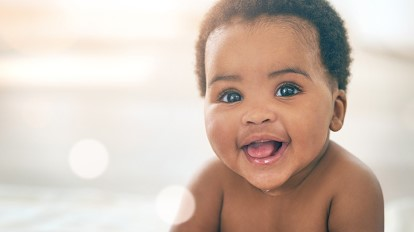

Age is:  10


In [ ]:
image = cv2.imread('/content/drive/My Drive/APS360/Project Files/baby3.jpg')
# displaying image
cv2_imshow(image)

age = age_detection_api(image)
if age==-1:
  print("Age could not be determined")
else:
  print("Age is: ", age)

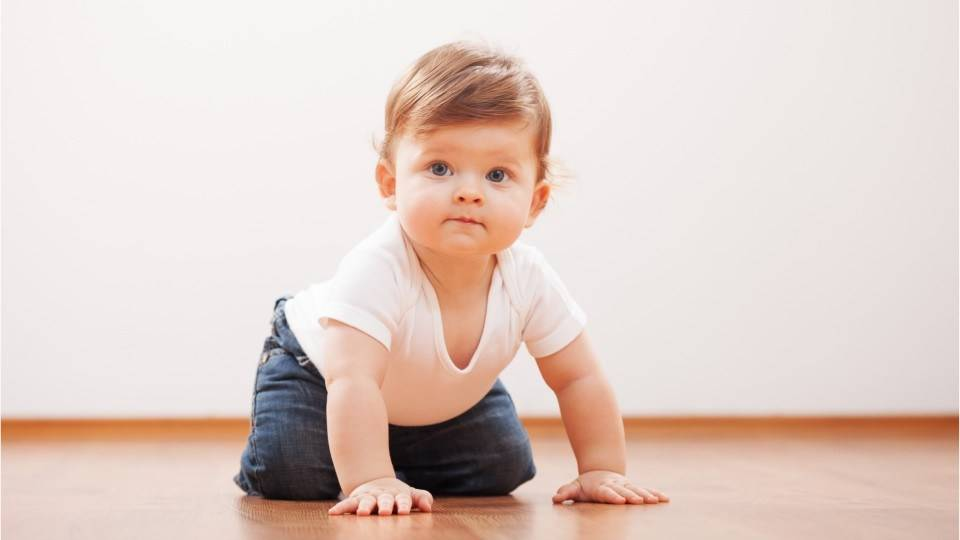

Age is:  14


In [ ]:
#Let's try another one!

#image = cv2.imread('/content/drive/My Drive/APS360/APS360 Project/Age Detection/sample_images/baby.jpg')
image = cv2.imread('/content/drive/My Drive/APS360/Project Files/baby.jpg')
# displaying image
cv2_imshow(image)

faces = agender.detect_genders_ages(image)

age = int(round(faces[0]["age"]) - 1)
print("Age is: ", age)

In [ ]:
faces = agender.detect_genders_ages(open_cv_image)

age = int(round(faces[0]["age"]) - 1)
print(faces)
print("Age is: ", age)

IndexError: ignored

In [ ]:
#Let's try another one!

image = cv2.imread('/content/drive/My Drive/APS360/Project Files/kid3.jfif')
# displaying image
cv2_imshow(image)

faces = agender.detect_genders_ages(image)

age = int(round(faces[0]["age"]) - 1)
print("Age is: ", age)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#store a list of all the outputs from Age Detection
ages_list = []

for i, data in test_loader:
        imgs, labels = data
        
        faces = agender.detect_genders_ages(imgs)
        age = int(round(faces[0]["age"]) - 1)
        if labels == 0: #NEED TO CHANGE THIS. IF IMAGE CLASSIFIED AS MASKED
          ages_list.append(0) #CLASS 0. No need to check age
        elif age < 6:
          ages_list.append(1) #Class 1: Age is between 0 and 5. Not required to wear
        elif age < 12:
          ages_list.append(1) #Class 2: Age is between 6 and 11. Not required, but recommended to wear
        elif age < 60:
          ages_list.append(1) #Class 3: Age is between 12 and 59. Required to wear
        else
          ages_list.append(1) #Class 4: Age is 60+. Required to wear and Very high risk to the virus      
        
#combine data fields with ages_list. Add ages_list to data like an "extra column"


In [ ]:
pip install sightengine

In [ ]:
from sightengine.client import SightengineClient
client = SightengineClient('{api_user}','{api_secret}')
#output = client.check('face-attributes').set_url('/content/drive/My Drive/APS360/Project Files/child.jpg')
output = client.check('face-attributes').set_url('https://sightengine.com/assets/img/examples/example7.jpg')
print(output)


{'status': 'failure', 'request': {'id': 'req_8CptdO4TAcfXbEhnFNCzD', 'timestamp': 1606485344.039343, 'operations': 0}, 'error': {'type': 'credentials_error', 'code': 1, 'message': 'Incorrect API user or API secret'}}
